In [ ]:
!pip install ultralytics  

In [2]:
# connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/road.v1i.yolov8.zip" -d "/content/dataset"

In [3]:
from ultralytics import YOLO

In [4]:
# Load a model

# model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [6]:
# Use the model
results = model.train(data="/content/dataset/data.yaml", epochs=3)  # train the model

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/dataset/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.Conv                  [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.Conv                  [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.C2f                   [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.Conv                  [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.C2f                   [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.Conv                  [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.C2f                   [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

In [7]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/dataset/valid/labels.cache... 574 images, 0 backgrounds, 0 corrupt: 100%|██████████| 574/574 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 36/36 [00:05<00:00,  7.00it/s]
                   all        574        910      0.796      0.735      0.782      0.573
               manhole        574        177      0.893      0.898      0.924      0.771
               pathole        574        733      0.698      0.572       0.64      0.376
Speed: 0.1ms pre-process, 2.5ms inference, 0.0ms loss, 0.8ms post-process per image


In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
results = model("/content/dataset/test/images/potholes360_png_jpg.rf.bdef010cfecaf44b41c202db527eb8af.jpg")  # predict on an image


image 1/1 /content/dataset/test/images/potholes360_png_jpg.rf.bdef010cfecaf44b41c202db527eb8af.jpg: 640x640 1 pathole, 24.4ms
Speed: 1.5ms pre-process, 24.4ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


tensor([[157.00000, 164.00000, 280.00000, 243.00000,   0.86152,   1.00000]], device='cuda:0')


In [19]:
!yolo predict model='/content/runs/detect/train/weights/best.pt' source='/content/dataset/test/images/potholes360_png_jpg.rf.bdef010cfecaf44b41c202db527eb8af.jpg'

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/dataset/test/images/potholes360_png_jpg.rf.bdef010cfecaf44b41c202db527eb8af.jpg: 640x640 1 pathole, 13.2ms
Speed: 3.6ms pre-process, 13.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


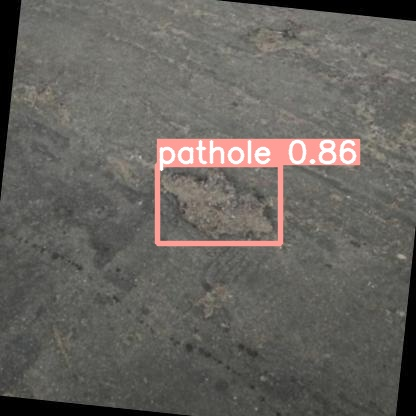

In [20]:
from google.colab.patches import cv2_imshow
import cv2 as cv

img = cv.imread('/content/runs/detect/predict/potholes360_png_jpg.rf.bdef010cfecaf44b41c202db527eb8af.jpg')
cv2_imshow(img)